## INTRODUCTION

COLLOBORATED BY : Manish Niure and Sajan Acharya

*Objective:*

- Explore the performance of multiple machine learning models in classifying tweets as disaster-related or not.
-Data Preprocessing like using vectorization
- Experiment with diverse architectures such as convolutional neural networks (CNNs), SVM , embeddings model etc
- Assess the strengths and weaknesses of each model type in capturing the nuanced semantics of tweets.
- Compare the accuracy, and loss metrics across different model implementations.

This exploration aims to provide comprehensive insights into the efficacy of various machine learning approaches for tweet classification,

##Setup

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


%cd

/root


In [ ]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots
import tensorflow as tf
import sklearn.metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:

#loading training data and test data
train_data = pd.read_csv('/content/drive/MyDrive/Disaster Tweets Data/train.csv')
print(train_data.shape)
test_data = pd.read_csv('/content/drive/MyDrive/Disaster Tweets Data/test.csv')
print(test_data.shape)


(7613, 5)
(3263, 4)


In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**Splitting Data**

https://realpython.com/train-test-split-python-data/

Split the training data (train.csv) into 80% for training and 20% for validation

In [ ]:
# spl
train, validation = train_test_split(train_data, test_size = 0.2,random_state = 10, shuffle = True)
print(train.shape ,validation.shape)

(6090, 5) (1523, 5)


##Data Analysis
In the data analysis phase, we perform exploratory data analysis (EDA) to understand the dataset's features and structure

In [ ]:
#  train data and validation data -> X_train , X_validation

X_train, X_target_data = train, train['target']
X_validation, X_validation_target = validation, validation['target']

print(f'Train \t\t\t Test')
print(f'X_train {X_train.shape} \t X_target_data shape {X_target_data.shape}')
print(f'X_validation {X_validation.shape} \t X_validation_target {X_validation_target.shape}')


Train 			 Test
X_train (6090, 5) 	 X_target_data shape (6090,)
X_validation (1523, 5) 	 X_validation_target (1523,)


In [ ]:
total_counts = X_target_data.value_counts()
print(total_counts)

target
0    3481
1    2609
Name: count, dtype: int64


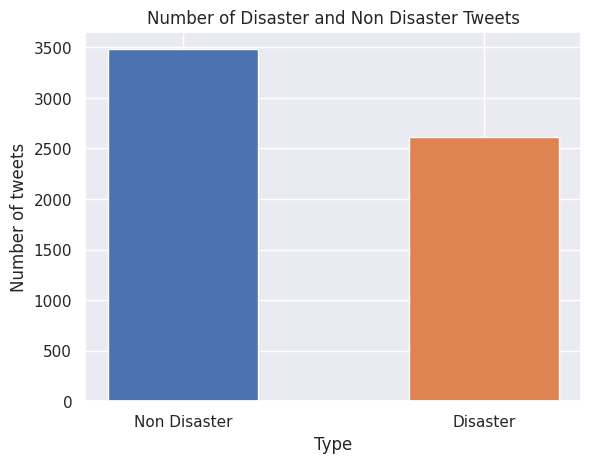

In [ ]:
# Plotting Disaster and Non Disaster
non_disaster, disaster = X_target_data.value_counts()
plt.bar('Non Disaster', non_disaster, width = 0.5)
plt.bar('Disaster', disaster, width = 0.5)
plt.xlabel("Type")
plt.ylabel("Number of tweets")
plt.title("Number of Disaster and Non Disaster Tweets")
plt.show()

**Analysis Of Tweets**

Looking at the plot, We can see that there are higher number of Non Disaster tweets(3460) than the Disaster Tweets(2630)*

In [ ]:
#Total number of tweets according to locations
locations_counts = X_train["location"].value_counts()

# Get the top 5 most common locations
locations_counts = locations_counts.sort_values(ascending=False)

top_5_locations = locations_counts.head(5)

print("Top 5 most common locations:")
print(top_5_locations)

Top 5 most common locations:
location
USA              82
New York         55
United States    39
London           38
Nigeria          25
Name: count, dtype: int64


In [ ]:
# Getting the total number of disaster tweets and non disaster tweets for top 5 locations.
location_tweet_counts = {}
for location in top_5_locations.index:
  # print(location)
  location_df = X_train[X_train['location'] == location]
  non_disaster_tweets, disaster_tweets = location_df['target'].value_counts()
  location_tweet_counts[location] = {'disaster_tweets': disaster_tweets, 'non_disaster_tweets':non_disaster_tweets}
location_tweet_counts_df = pd.DataFrame(location_tweet_counts).T
print(location_tweet_counts_df)

               disaster_tweets  non_disaster_tweets
USA                         27                   55
New York                    12                   43
United States               18                   21
London                      14                   24
Nigeria                      4                   21


In [ ]:
location_tweet_counts_df.head()

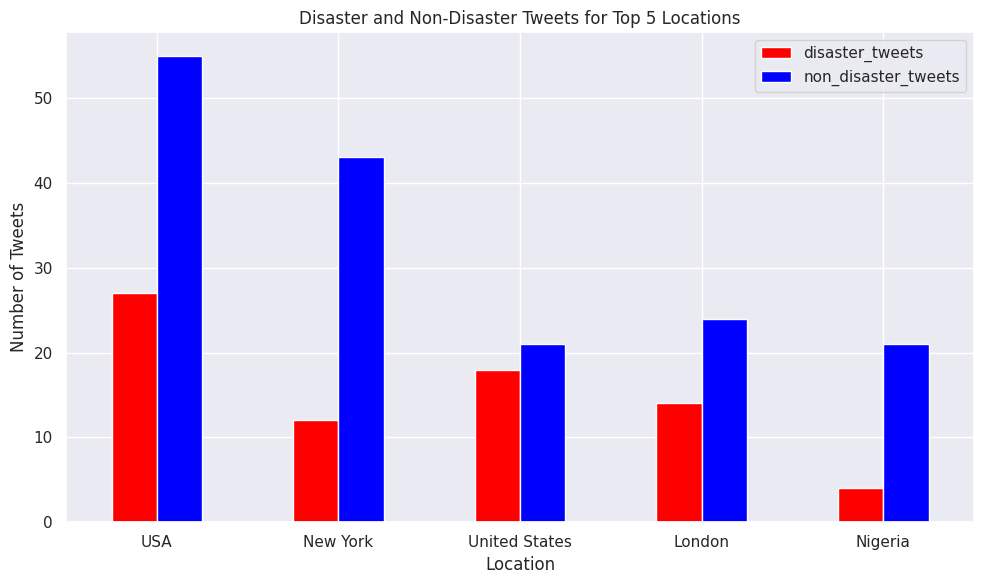

In [ ]:
# Assuming location_tweet_counts_df contains your DataFrame as shown

# Plot the DataFrame
colors = ['red', 'blue']
location_tweet_counts_df.plot(kind='bar', figsize=(10, 6), color = colors)

# Set the title and labels
plt.title('Disaster and Non-Disaster Tweets for Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Looking at the plot, We can see different locations with their total number of disaster/non_disaster tweets. USA has the highest number of tweets in both catagory


In [ ]:
#Total number of tweets according to Keywords
keywords_df = X_train.groupby(['keyword', 'target']).size().unstack(fill_value=0)
keywords_df['total_count'] = keywords_df.sum(axis=1)
sorted_keywords_df = keywords_df.sort_values(by='total_count', ascending=False)
sorted_keywords_df.head()

target,0,1,total_count
keyword,,,
fatalities,13,23,36
windstorm,21,15,36
whirlwind,22,14,36
hellfire,29,6,35
ruin,33,1,34


In [ ]:
# getting the top 5 keywords and formatting column names
top_5_keywords_df = sorted_keywords_df.head(5)
print(top_5_keywords_df.columns)
top_5_keywords_df = top_5_keywords_df.rename(columns={0: 'non disaster', 1: 'disaster'})

Index([0, 1, 'total_count'], dtype='object', name='target')


In [ ]:
top_5_keywords_df = top_5_keywords_df.drop(columns=['total_count'])

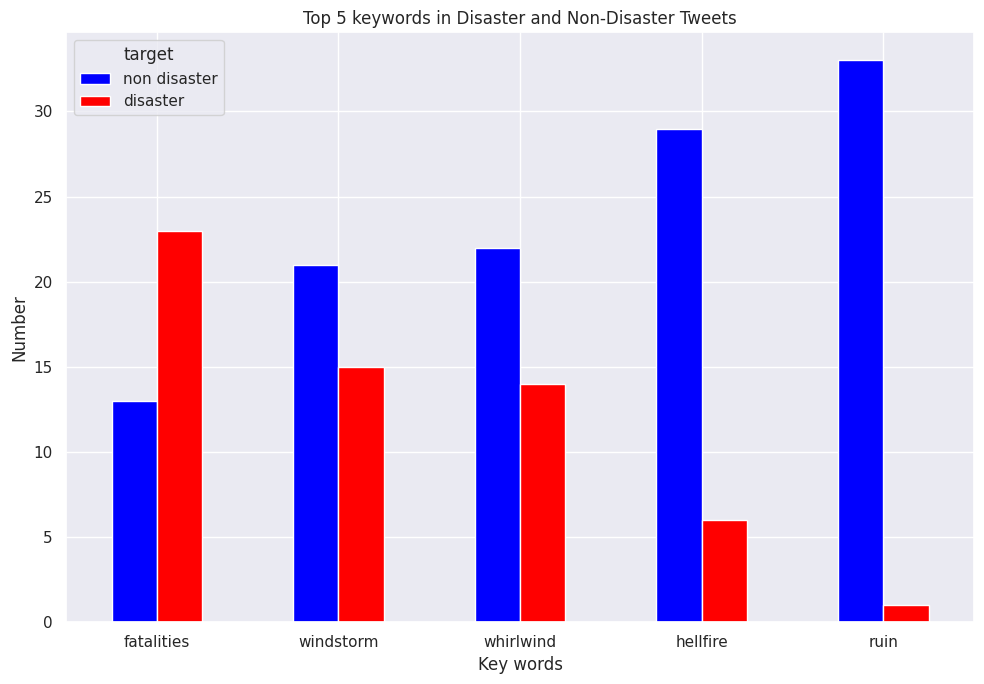

In [ ]:
#bar plot of the top 5 keywords in the tweets.
colors = ['blue', 'red']
top_5_keywords_df.plot(kind='bar', figsize=(10, 7), color = colors)

# Set the title and labels
plt.title('Top 5 keywords in Disaster and Non-Disaster Tweets')
plt.xlabel('Key words')
plt.ylabel('Number')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*#Looking at the plot, We can see different that fatalities keyword falls mostly in the disaster tweets*

## Baseline Model

Our training dataset consists of 2609 disaster tweets  ~(43%), and 3481 non-disaster tweets ~(58%), so our majority class baseline classifies most of the tweets as as non-disaster, and will have an accuracy of ~58%. We will see if we can beat this baseline with a trained model.

In [ ]:
# finding shape
print(X_train.shape)
print(X_validation.shape)
total_counts =X_target_data.value_counts()
print(total_counts)

(6090, 5)
(1523, 5)
target
0    3481
1    2609
Name: count, dtype: int64


Log Loss function to determine loss

In [ ]:
def log_loss(Y_true, Y_pred):
  """Returns the binary log loss for a list of labels and predictions.

  Args:
    Y_true: A list of (true) labels (0 or 1)
    Y_pred: A list of corresponding predicted probabilities

  Returns:
    Binary log loss
  """
  # YOUR CODE HERE (1)
  # preventing from log(0)
  eps = 1e-15
  Y_pred = np.clip(Y_pred, eps, 1 - eps)
  entropy_loss = np.mean(-(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred)))
  return entropy_loss

### Trained Loss and Validation Loss


Based on the given original distribution of classees in our dataset ,we are using 0.45 as predicted probaility that's the percentage of disaster tweets .
Baseline Probalility = 0.45

In [ ]:
# training loss
train_prediction = np.array([0.45]*len(X_train)) # using 0.45 for predicted prob
print(train_prediction)
train_binary_log_loss = log_loss(X_train["target"], train_prediction)
print("Training dataset binary log loss : ", train_binary_log_loss)


#validation loss
validation_prediction = np.array([0.45]*len(X_validation))
print(validation_prediction)
validation_data_binary_log_loss = log_loss(X_validation["target"],validation_prediction)
print("Validation dataset binary log loss : ", validation_data_binary_log_loss)

[0.45 0.45 0.45 ... 0.45 0.45 0.45]
Training dataset binary log loss :  0.683805776529143
[0.45 0.45 0.45 ... 0.45 0.45 0.45]
Validation dataset binary log loss :  0.6850622144102128


## DATA PRE PROCESSING

In [ ]:
# Check for missing values in text column
print("Number of rows with missing text:", train_data['text'].isnull().sum())

# Check for missing values in target column
print("Number of rows with missing target:", train_data['target'].isnull().sum())

Number of rows with missing text: 0
Number of rows with missing target: 0


### Exploring Text Embeddings


In this exploration of text embeddings, our primary focus is on converting textual data into tokens.

In [75]:
# all words in the tweets
from collections import Counter
import re
from tensorflow.keras.preprocessing.text import Tokenizer

combined_text = ''.join(train_data['text'])
words = combined_text.split()
# print(combined_text)

# Tokenize the text using regular expressions
tokens = re.findall(r'\b\w+\b', combined_text.lower())  # Convert to lowercase for case-insensitive counting
# print(tokens)

# Count the occurrences of each token
word_frequency = Counter(tokens)
# print(word_frequency)

# Tokenize the text
tokenizer = Tokenizer(num_words=None, oov_token='<OOV>', lower=True)
tokenizer.fit_on_texts([tokens])

# Get the word index
word_index = tokenizer.word_index
# Add entries for special tokens.

word_index = dict([(key, value+3) for (key,value) in word_index.items()])
word_index['<START>'] = 1 # start of input
word_index['#'] = 2       # out-of-vocabulary (OOV)
word_index['<UNUSED>'] = 3
# print(word_index)

# Reverse index
# Create a reverse index (k, v) --> (v, k) so we can lookup tokens by their id.
reverse_index = dict([(value, key) for (key, value) in word_index.items()])

# print(reverse_index)
max_id = max(reverse_index.keys())
# print('MAX ID :', max_id)

In [ ]:
def encode(text):
  # Split the input text into individual words.
  words = text.lower().split()
  # Look up the integer value of each word in the index dictionary.
  # If a word is not in the dictionary, use the integer value for the "<OOV>" token.
  token_ids = [word_index.get(word, 4) for word in words]

  return token_ids

# Show the ids corresponding tokens in the first example.
encoded_tweets = [encode(x) for x in train_data['text']]
print(train_data['text'][7])
print(encode(train_data['text'][1]))
print(encode("Two giant cranes holding a bridge collapse int"))

I'm on top of the hill and I can see a fire in the woods...
[199, 54, 226, 824, 6444, 4, 1493]
[140, 817, 1298, 1029, 9, 370, 170, 14785]


In [ ]:
# convert every rows text into index
# Apply the encode function to all text data in the 'text' column of train_data
train_dataset = train_data.copy()
train_dataset['text'] = train_dataset['text'].apply(encode)
print(train_dataset.head())
#split the data after encoding
training_data, validation_data = train_test_split(train_dataset, test_size = 0.2,random_state = 10, shuffle = True)
# print(validation_data.head())
# print(training_data.head())

   id keyword location                                               text  \
0   1     NaN      NaN  [125, 4348, 30, 8, 940, 12, 26, 4, 138, 1546, ...   
1   4     NaN      NaN                 [199, 54, 226, 824, 6444, 4, 1493]   
2   5     NaN      NaN  [47, 1860, 1547, 11, 4, 10, 4, 30, 139, 6447, ...   
3   6     NaN      NaN               [4, 67, 4350, 4, 288, 1334, 10, 102]   
4   7     NaN      NaN  [39, 105, 1174, 26, 663, 27, 6449, 4, 35, 342,...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
def decode(token_ids):
  """Return a string with the decoded text given a list of token ids."""
  # Try looking up each id in the index, but return '#' (for OOV) if not found.
  tokens = [reverse_index.get(i, "#") for i in token_ids]

  # Connect the string tokens with a space.
  return ' '.join(tokens)

# Sample token IDs
token_ids = [1,140, 817, 1298, 1029, 9, 370, 170, 14785]
# Show the ids corresponding to tokens in the first example.
print(token_ids)
# Decode the token IDs
decoded_text = decode(token_ids)
# Print the decoded text
print(decoded_text)

[1, 140, 817, 1298, 1029, 9, 370, 170, 14785]
<START> two giant cranes holding a bridge collapse int


### Padding And Reducing Length

We'll also use this operation to limit the number of token positions by truncating all reviews to a specified length. In the code below, as an example, we pad all training inputs to length 250.

In [ ]:
def pad_data(sequences, max_length):
  # Keras has a convenient utility for padding a sequence.
  # Also make sure we get a numpy array rather than an array of lists.
  return np.array(list(
      tf.keras.preprocessing.sequence.pad_sequences(
          sequences, maxlen=max_length, padding='post', value=0)))

# Pad and truncate to 250 tokens.
train_padded_data = pad_data(training_data['text'], max_length=250) # do
print(len(train_padded_data))

# check the first row text
# Check the padded output.
print('Length of X_train[0]:', len(training_data['text']))
print('Length of X_train_padded[0]:', len(train_padded_data[1]))
print(train_padded_data[0])
print(decode(train_padded_data[0]))

6090
Length of X_train[0]: 6090
Length of X_train_padded[0]: 250
[    4  1143    66 12053     4 12054  2427    11   365    21   880    22
     4   861   365 12055    13 12056    11   364    25     4     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     

### Reduced Vocabulary

We also want to be able to limit the vocabulary size.

In [ ]:
def limit_vocab(sequences, max_token_id, oov_id=2):
  """Replace token ids greater than or equal to max_token_id with the oov_id."""
  reduced_sequences = np.copy(sequences)
  reduced_sequences[reduced_sequences >= max_token_id] = oov_id
  return reduced_sequences

# Reduce vocabulary to 1000 tokens.
X_train_reduced = limit_vocab(train_padded_data, max_token_id=1000)
print(X_train_reduced[0])

# Decode to see what this looks like in tokens. Note the '#' for OOVs.
print(decode(X_train_reduced[0]))

[  4   2  66   2   4   2   2  11 365  21 880  22   4 861 365   2  13   2
  11 364  25   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

### One-Hot Encoding

Our current feature representations are **sparse**. That is, we only keep track of the token IDs that are present in the input. A **one-hot** encoding replaces a value like 80 (corresponding to 'disaster') with an array with a single 1 at position 88 and zeros everywhere else. This will be very memory-inefficient, but we'll do it anyway for clarity.

In [ ]:
# Keras has a util to create one-hot encodings.
X_train_padded = pad_data(training_data['text'], max_length=20)
X_train_reduced = limit_vocab(X_train_padded, max_token_id=1000)
X_train_one_hot = tf.keras.utils.to_categorical(X_train_reduced)
print('X_train_one_hot shape:', X_train_one_hot.shape)
print(X_train_one_hot)

X_train_one_hot shape: (6090, 20, 1000)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.

# **FEATURE MODEL ENGINEERING AND ERROR ANALYSIS**



### Logistic Regression With One-Hot Encodings
Let's start with something familiar -- logistic regression. Since our feature representation is in 2 dimensions (20 x 1000), we need to flatten it to pass it to Keras (remember we did this with the pixel data too). Let's try two strategies for flattening.

1. Flatten by *concatenating* (as we did with pixels), turning (20 x 1000) data into (20000,) data. The result is a separate feature for each token at each position.
2. Flatten by *averaging* over token positions, turning (20 x 1000) data into (1000,) data. The result is an array with average token counts, ignoring position.

Here we'll use the [**Adam**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which sometimes gives better results. One key characteristic of Adam is that it effectively uses a different learning rate for each parameter rather than a fixed learning rate as in SGD.

In [ ]:
def build_onehot_model(average_over_positions=False):
  """Build a tf.keras model for one-hot data."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(0)

  model = tf.keras.Sequential()
  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation='sigmoid'         # sigmoid activation for classification
  ))

  model.compile(loss='binary_crossentropy',   # this is a classification task
                optimizer='adam',             # fancy optimizer
                metrics=['accuracy'])
  return model

In [ ]:
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5472 - loss: 0.6842 - val_accuracy: 0.5928 - val_loss: 0.6613
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6110 - loss: 0.6519 - val_accuracy: 0.6273 - val_loss: 0.6449
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6661 - loss: 0.6257 - val_accuracy: 0.6453 - val_loss: 0.6316
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7151 - loss: 0.6029 - val_accuracy: 0.6634 - val_loss: 0.6204
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7447 - loss: 0.5827 - val_accuracy: 0.6749 - val_loss: 0.6109
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7688 - loss: 0.5645 - val_accuracy: 0.6880 - val_loss: 0.6026
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7856 - loss: 0.5479 - val_accuracy: 0.7028 - val_loss: 0.5953
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7979 - loss: 0.5326 - val_accuracy: 0.7126 - val_loss:

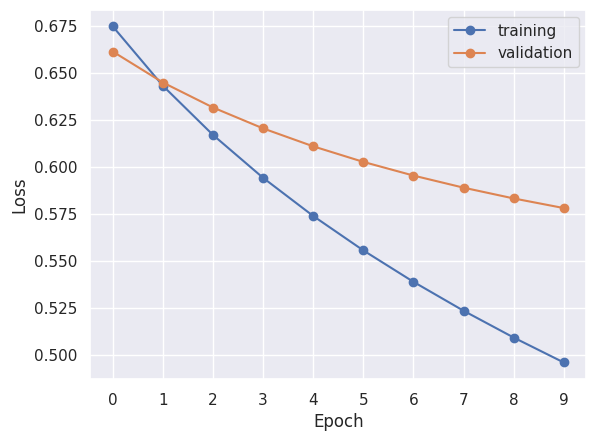

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 20000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          20,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,005 (234.40 KB)

 Trainable params: 20,001 (78.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,004 (156.27 KB)

In [ ]:
model = build_onehot_model()
# Fit the model.
history = model.fit(
  x = X_train_one_hot,  # one-hot training data
  y = training_data['target'],          # corresponding binary labels
  epochs=10,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

# Convert the return value into a DataFrame so we can see the train loss
# and binary accuracy after every epoch.
history = pd.DataFrame(history.history)
plot_history(history)
model.summary()

In [ ]:
# model -> one hot encodings
history.tail()

,accuracy,loss,val_accuracy,val_loss
5,0.782521,0.555525,0.688013,0.602621
6,0.799854,0.538806,0.702791,0.595346
7,0.812808,0.523419,0.712644,0.588908
8,0.826127,0.509165,0.717570,0.583178
9,0.835979,0.495889,0.724138,0.578055


#### ERROR ANALYSIS OF ONE_HOT_MODEL

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[3375  106]
 [ 971 1638]]


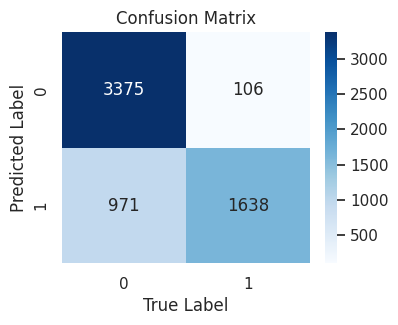

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on the validation data (which is part of the training data)
train_loss, train_accuracy = model.evaluate(X_train_one_hot, training_data['target'], verbose=0)

# Generate predictions on the validation data
predictions = model.predict(X_train_one_hot)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate the confusion matrix for the validation data
conf_matrix = confusion_matrix(training_data['target'], predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()


### Analysis of Confusion Matrix

The confusion matrix provides a snapshot of the model's classification performance:

- True Positives (TP): 3318
- True Negatives (TN): 1781
- False Positives (FP): 163
- False Negatives (FN): 828


Based on the analysis of the confusion matrix, the model demonstrates strong performance in correctly classifying both positive and negative instances, as evidenced by the high counts of true positives (TP) and true negatives (TN). However, there are areas for improvement, particularly in reducing the number of false positives (FP) and false negatives (FN).


---
### Logistic Regression With Embeddings
Next, let's train model that replaces one-hot representations of each token with learned embeddings.

The code below uses a Keras Embedding layer, which expects to receive a sparse (rather than one-hot) representation. That is, it expects a (padded) sequence of token IDs; for each ID, it looks up the corresponding embedding vector.


We are using the averaging strategy rather than the concatenating strategy for dealing with the token sequence. That is, we'll look up embedding vectors for each token. Then we'll average them to produce a single vector. Then we'll train a logistic regression with that vector as input to predict the binary label.


In [ ]:
def build_embeddings_model(average_over_positions=True,
                           vocab_size=1000,
                           sequence_length=20,
                           embedding_dim=2):
  """Build a tf.keras model using embeddings."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=sequence_length)
  )

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())


  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation='sigmoid'         # apply the sigmoid function!
  ))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5440 - loss: 0.6897 - val_accuracy: 0.5764 - val_loss: 0.6769
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5562 - loss: 0.6800 - val_accuracy: 0.5764 - val_loss: 0.6701
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5570 - loss: 0.6753 - val_accuracy: 0.5813 - val_loss: 0.6641
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 0.6696 - val_accuracy: 0.5928 - val_loss: 0.6573
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 0.6629 - val_accuracy: 0.6026 - val_loss: 0.6497
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 0.6551 - val_accuracy: 0.6305 - val_loss: 0.6412
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 0.6465 - val_accuracy: 0.6535 - val_loss: 0.6320
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.6373 - val_accuracy: 0.6700 - val_loss: 0.6223
Epo

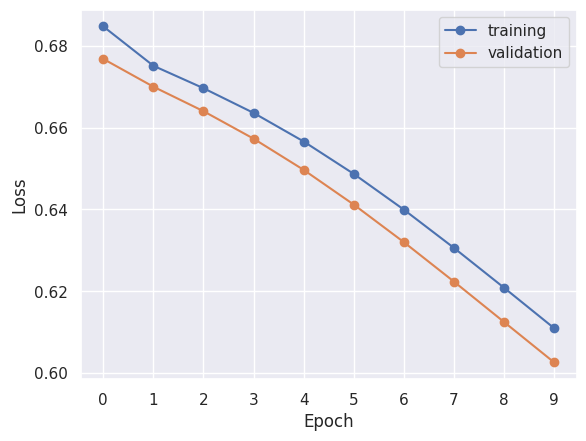

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 2)               │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 2)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,011 (23.48 KB)

 Trainable params: 2,003 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,008 (15.66 KB)

In [ ]:
model1 = build_embeddings_model(average_over_positions=True,
                               vocab_size=1000,
                               sequence_length=20,
                               embedding_dim=2)
history = model1.fit(
  x = X_train_reduced,  # our sparse padded training data
  y = training_data['target'],          # corresponding binary labels
  epochs=10,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

history = pd.DataFrame(history.history)
plot_history(history)
model1.summary()

In [ ]:
# model1 -> Logistic Regressions With Embedddings
history.tail()

,accuracy,loss,val_accuracy,val_loss
5,0.623791,0.648707,0.630542,0.641189
6,0.642036,0.639955,0.653530,0.631996
7,0.665572,0.630587,0.669951,0.622334
8,0.679256,0.620834,0.692939,0.612447
9,0.692574,0.610926,0.709360,0.602555


Checking for some random dimensions

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5440 - loss: 0.6897 - val_accuracy: 0.5764 - val_loss: 0.6769
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5562 - loss: 0.6800 - val_accuracy: 0.5764 - val_loss: 0.6701
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5570 - loss: 0.6753 - val_accuracy: 0.5813 - val_loss: 0.6641
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 0.6696 - val_accuracy: 0.5928 - val_loss: 0.6573
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 0.6629 - val_accuracy: 0.6026 - val_loss: 0.6497
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 0.6551 - val_accuracy: 0.6305 - val_loss: 0.6412
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 0.6465 - val_accuracy: 0.6535 - val_loss: 0.6320
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6482 - loss: 0.6373 - val_accuracy: 0.6700 - val_loss: 0.6223
Epo

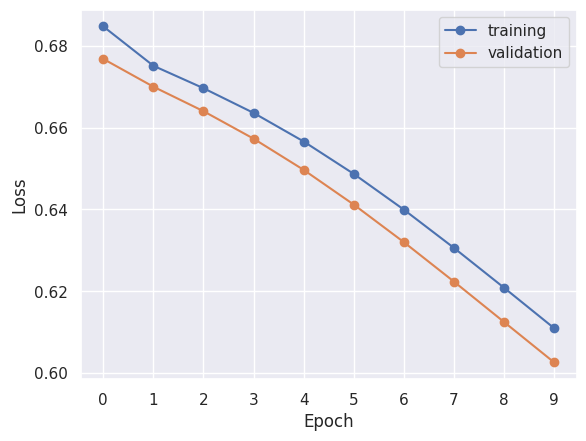

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 2)               │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 2)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,011 (23.48 KB)

 Trainable params: 2,003 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,008 (15.66 KB)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5465 - loss: 0.6881 - val_accuracy: 0.5764 - val_loss: 0.6739
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5566 - loss: 0.6779 - val_accuracy: 0.5796 - val_loss: 0.6657
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 0.6708 - val_accuracy: 0.5944 - val_loss: 0.6566
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5877 - loss: 0.6615 - val_accuracy: 0.6190 - val_loss: 0.6456
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6136 - loss: 0.6503 - val_accuracy: 0.6502 - val_loss: 0.6330
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.6375 - val_accuracy: 0.6732 - val_loss: 0.6194
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6238 - val_accuracy: 0.6929 - val_loss: 0.6053
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - loss: 0.6099 - val_accuracy: 0.7126 - val_loss:

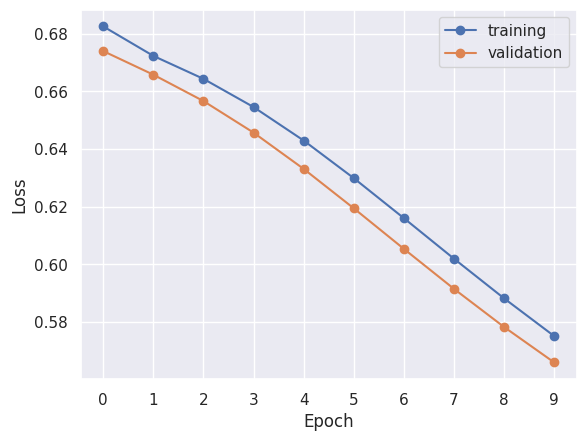

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 4)               │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 4)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,017 (46.95 KB)

 Trainable params: 4,005 (15.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,012 (31.30 KB)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5618 - loss: 0.6873 - val_accuracy: 0.5764 - val_loss: 0.6713
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5601 - loss: 0.6754 - val_accuracy: 0.5878 - val_loss: 0.6603
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5836 - loss: 0.6646 - val_accuracy: 0.6174 - val_loss: 0.6460
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6164 - loss: 0.6497 - val_accuracy: 0.6535 - val_loss: 0.6283
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.6316 - val_accuracy: 0.6946 - val_loss: 0.6086
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - loss: 0.6119 - val_accuracy: 0.7110 - val_loss: 0.5889
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7159 - loss: 0.5924 - val_accuracy: 0.7307 - val_loss: 0.5704
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7381 - loss: 0.5742 - val_accuracy: 0.7504 - val_loss:

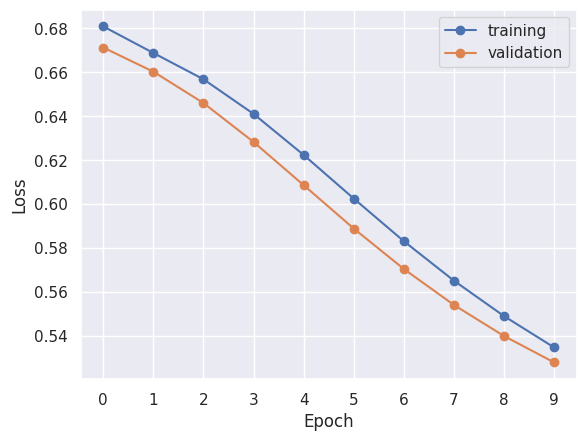

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 8)               │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 8)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,029 (93.87 KB)

 Trainable params: 8,009 (31.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,020 (62.58 KB)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5506 - loss: 0.6851 - val_accuracy: 0.5796 - val_loss: 0.6642
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5787 - loss: 0.6670 - val_accuracy: 0.6174 - val_loss: 0.6433
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - loss: 0.6449 - val_accuracy: 0.6683 - val_loss: 0.6169
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.6179 - val_accuracy: 0.7077 - val_loss: 0.5889
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: 0.5902 - val_accuracy: 0.7323 - val_loss: 0.5633
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7421 - loss: 0.5651 - val_accuracy: 0.7553 - val_loss: 0.5419
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7549 - loss: 0.5435 - val_accuracy: 0.7603 - val_loss: 0.5248
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7646 - loss: 0.5253 - val_accuracy: 0.7685 - val_loss:

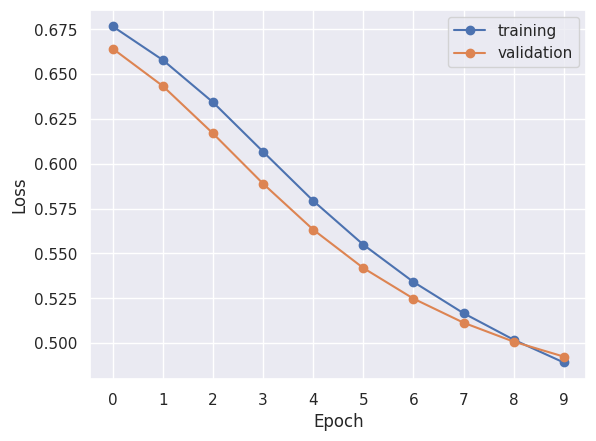

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 16)              │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,053 (187.71 KB)

 Trainable params: 16,017 (62.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,036 (125.14 KB)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5659 - loss: 0.6827 - val_accuracy: 0.5911 - val_loss: 0.6564
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6041 - loss: 0.6569 - val_accuracy: 0.6502 - val_loss: 0.6226
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - loss: 0.6213 - val_accuracy: 0.7126 - val_loss: 0.5833
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7315 - loss: 0.5830 - val_accuracy: 0.7537 - val_loss: 0.5494
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7544 - loss: 0.5501 - val_accuracy: 0.7619 - val_loss: 0.5241
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.5241 - val_accuracy: 0.7750 - val_loss: 0.5062
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.5035 - val_accuracy: 0.7800 - val_loss: 0.4933
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4865 - val_accuracy: 0.7833 - val_loss:

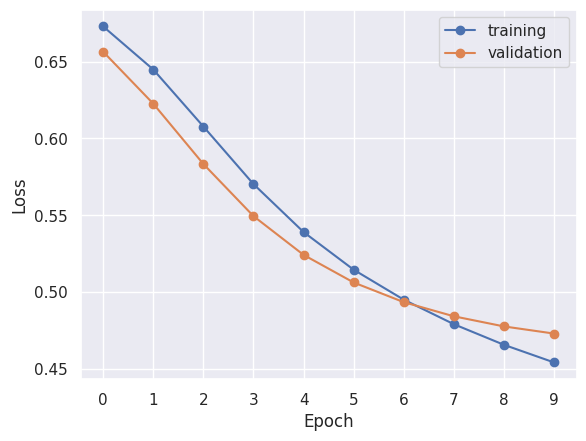

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 32)              │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,101 (375.40 KB)

 Trainable params: 32,033 (125.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,068 (250.27 KB)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5597 - loss: 0.6805 - val_accuracy: 0.6026 - val_loss: 0.6462
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6375 - loss: 0.6422 - val_accuracy: 0.6979 - val_loss: 0.5937
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5896 - val_accuracy: 0.7553 - val_loss: 0.5451
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 0.5440 - val_accuracy: 0.7718 - val_loss: 0.5132
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7734 - loss: 0.5111 - val_accuracy: 0.7849 - val_loss: 0.4937
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7890 - loss: 0.4867 - val_accuracy: 0.7849 - val_loss: 0.4817
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 0.4675 - val_accuracy: 0.7947 - val_loss: 0.4743
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8055 - loss: 0.4520 - val_accuracy: 0.7997 - val_loss:

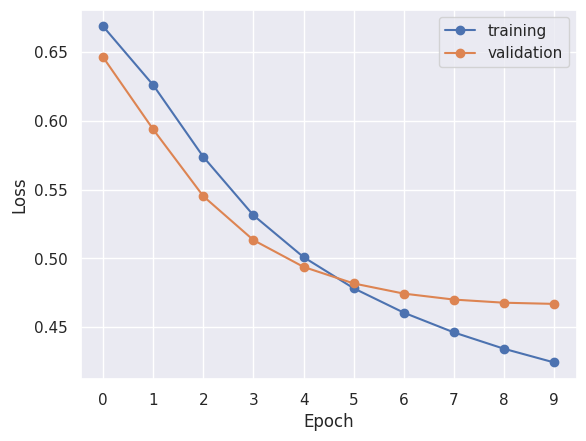

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 64)              │          64,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192,197 (750.77 KB)

 Trainable params: 64,065 (250.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 128,132 (500.52 KB)

In [ ]:
dimensions = [2,4,8,16,32,64]
for dim in dimensions:
  model = build_embeddings_model(average_over_positions=True,
                                vocab_size=1000,
                                sequence_length=20,
                                embedding_dim=dim)
  history = model.fit(
    x = X_train_reduced,  # our sparse padded training data
    y = training_data['target'],          # corresponding binary labels
    epochs=10,             # number of passes through the training data
    batch_size=64,        # mini-batch size
    validation_split=0.1, # use a fraction of the examples for validation
    verbose=1             # display some progress output during training
    )

  history = pd.DataFrame(history.history)
  plot_history(history)
  model.summary()

---
#### ERROR ANALYSIS FOR BUILLD EMBEDDINGS MODEL

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[3361  120]
 [1747  862]]


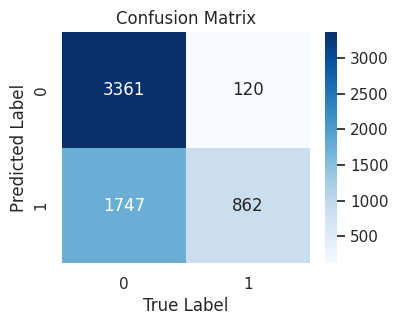

In [ ]:
from sklearn.metrics import confusion_matrix


# Evaluate the model on the train data (which is part of the training data)
train_loss, train_accuracy = model1.evaluate(X_train_reduced, training_data['target'], verbose=0)

# Generate predictions on the train data
predictions = model1.predict(X_train_reduced)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate the confusion matrix for the validation data
conf_matrix = confusion_matrix(training_data['target'], predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()



The confusion matrix provides a snapshot of the model's classification performance:

- True Positives (TP): 3385
- True Negatives (TN): 872
- False Positives (FP): 96
- False Negatives (FN): 1737


Based on the analysis of the confusion matrix, the model demonstrates strong performance in correctly classifying both positive and negative instances, as evidenced by the high counts of true positives (TP) and true negatives (TN). However, there are areas for improvement, particularly in reducing the number of false positives (FP) and false negatives (FN).


---
Now we'll use a fancy plotting tool called plotly to show the embeddings with hovertext so you can move your mouse over the points to see the corresponding tokens.

In [ ]:
# Display the model layers. (using Build Embedding Model)
display(model1.layers)
# Retrieve the embeddings layer, which itself is wrapped in a list.
embeddings = model1.layers[0].get_weights()[0]
display(embeddings.shape)


def plot_2d_embeddings(embeddings, id_start=1, count=100):
  # Get 1st and 2nd embedding dims for the desired tokens.
  x1 = embeddings[id_start:id_start+count, 0]
  x2 = embeddings[id_start:id_start+count, 1]

  # Get the corresponding words from the reverse index (for labeling).
  tokens = [reverse_index[i] for i in range(id_start, id_start+count)]

  # Plot with the plotly library.
  data = plotly.Scatter(x=x1, y=x2, text=tokens,
                        mode='markers', textposition='bottom left',
                        hoverinfo='text')
  fig = plotly.Figure(data=[data],
                      layout=plotly.Layout(title="Word Embeddings",
                                           hovermode='closest'))
  fig.show()

# Very frequent tokens tend to be more syntactic than semantic, so let's plot
# some rarer words.
plot_2d_embeddings(embeddings, id_start=500, count=500)

[<Embedding name=embedding, built=True>,
 <GlobalAveragePooling1D name=global_average_pooling1d, built=True>,
 <Dense name=dense, built=True>]

(1000, 2)

---

Adding Extra dense layer and maximizing the tokens

In [ ]:
#model2
def build_deep_embeddings_model(vocab_size,
                                sequence_length,
                                embedding_dim,
                                average_over_positions=False):
    """Build a tf.keras model using embeddings."""
    # Clearing and removing randomness
    tf.keras.backend.clear_session()

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=sequence_length)
    )

    if average_over_positions:
        model.add(tf.keras.layers.GlobalAveragePooling1D())
    else:
        model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(
        units=60,
        activation='relu'
    ))

    model.add(tf.keras.layers.Dense(
        units=60,
        activation='relu'
    ))

    model.add(tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    ))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

X_train_padded = pad_data(training_data['text'], max_length=400)
X_train_reduced = limit_vocab(X_train_padded, max_token_id=2000)

model2 = build_deep_embeddings_model(
    vocab_size=20000,
    sequence_length=400,
    embedding_dim=2,
    average_over_positions=True
)

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5465 - loss: 0.6892 - val_accuracy: 0.5764 - val_loss: 0.6821
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5561 - loss: 0.6882 - val_accuracy: 0.5764 - val_loss: 0.6822
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5561 - loss: 0.6883 - val_accuracy: 0.5764 - val_loss: 0.6822
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5561 - loss: 0.6883 - val_accuracy: 0.5764 - val_loss: 0.6821
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5561 - loss: 0.6882 - val_accuracy: 0.5764 - val_loss: 0.6820


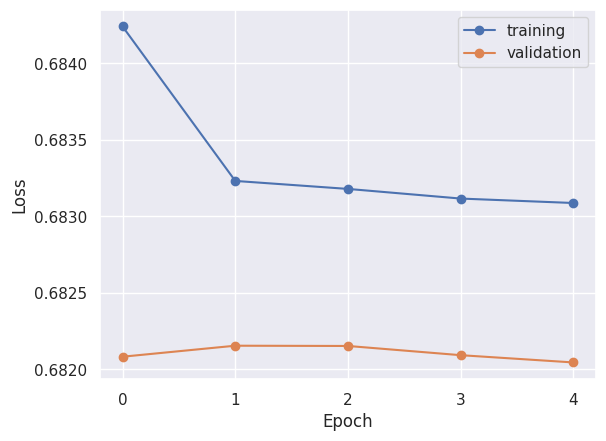

In [ ]:
history = model2.fit(
  x = X_train_reduced,  # our sparse padded training data
  y = training_data['target'],          # corresponding binary labels
  epochs=5,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1,            # display some progress output during training
  )
history = pd.DataFrame(history.history)
plot_history(history)

We saw some issues in this model . This model is only for experiment.

In [ ]:
# model2 Build Deep Embeddings Model
history.tail()

,accuracy,loss,val_accuracy,val_loss
0,0.568145,0.684240,0.576355,0.682082
1,0.571064,0.683231,0.576355,0.682154
2,0.571064,0.683178,0.576355,0.682152
3,0.571064,0.683115,0.576355,0.682092
4,0.571064,0.683086,0.576355,0.682044


###CNN MODEL

Using the concept from here : https://keras.io/examples/nlp/text_classification_from_scratch/

In [ ]:
def build_cnn_model(vocab_size=3000, max_len=100, embedding_dim=4):
    """
    Build a Convolutional Neural Network (CNN) model for text classification.

    Args:
        vocab_size (int): Size of the vocabulary.
        max_len (int): Maximum length of input sequences.
        embedding_dim (int): Dimension of word embeddings.

    Returns:
        tf.keras.Model: CNN model for text classification.
    """
    tf.keras.backend.clear_session()
    tf.keras.utils.set_random_seed(0)

    # Define the input layers
    text_input = tf.keras.layers.Input(shape=(max_len,), dtype='int32', name='text')
    length_input = tf.keras.layers.Input(shape=(1,), name='length')

    # Embedding layer
    embedded_text = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(text_input)

    # Convolutional layers with different filter sizes
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu')(embedded_text)
    conv_2 = tf.keras.layers.Conv1D(filters=128, kernel_size=4, padding='valid', activation='relu')(embedded_text)
    conv_3 = tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='valid', activation='relu')(embedded_text)
    conv_4 = tf.keras.layers.Conv1D(filters=128, kernel_size=6, padding='valid', activation='softmax')(embedded_text)

    # Normalization layers
    batch_norm1 = tf.keras.layers.BatchNormalization()(conv_1)
    batch_norm2 = tf.keras.layers.BatchNormalization()(conv_2)
    batch_norm3 = tf.keras.layers.BatchNormalization()(conv_3)
    batch_norm4 = tf.keras.layers.BatchNormalization()(conv_4)

    # Max pooling layers
    pool1 = tf.keras.layers.GlobalMaxPooling1D()(batch_norm1)
    pool2 = tf.keras.layers.GlobalMaxPooling1D()(batch_norm2)
    pool3 = tf.keras.layers.GlobalMaxPooling1D()(batch_norm3)
    pool4 = tf.keras.layers.GlobalMaxPooling1D()(batch_norm4)

    # Concatenate the pooled features
    merged = tf.keras.layers.concatenate([pool1, pool2, pool3, pool4], axis=-1)

    # Concatenate with the length input
    merged = tf.keras.layers.concatenate([merged, length_input])

    # Dense layers
    dense_1 = tf.keras.layers.Dense(128, activation='relu')(merged)
    dense_2 = tf.keras.layers.Dense(64, activation='relu')(dense_1)

    # Output layer
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)

    # Define the model
    model = tf.keras.models.Model(inputs=[text_input, length_input], outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

max_len = len(X_train_reduced[0])  # Calculate the actual maximum sequence length in X_train_reduced

# Build the model with the updated max_len
model3 = build_cnn_model(max_len=max_len)

# Train the model
history = model3.fit(
  x = [ X_train_reduced, np.array([len(x)//10 for x in X_train_reduced])],
  y = training_data['target'],
  epochs=5,
  batch_size=32,
  validation_split=0.1,
  verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.5726 - loss: 0.6778 - val_accuracy: 0.5764 - val_loss: 0.6683
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - accuracy: 0.7911 - loss: 0.4684 - val_accuracy: 0.6765 - val_loss: 0.5831
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 46s 206ms/step - accuracy: 0.8259 - loss: 0.3894 - val_accuracy: 0.7947 - val_loss: 0.4855
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 31s 179ms/step - accuracy: 0.8574 - loss: 0.3323 - val_accuracy: 0.7685 - val_loss: 0.5424
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step - accuracy: 0.8813 - loss: 0.2854 - val_accuracy: 0.7176 - val_loss: 0.7217


In [ ]:
#model3 - CNN Model
for epoch in range(1, len(history.history['loss']) + 1):
    print(f"Epoch {epoch}:")
    print("Training Loss:", history.history['loss'][epoch - 1])
    print("Training Accuracy:", history.history['accuracy'][epoch - 1])
    print("Validation Loss:", history.history['val_loss'][epoch - 1])
    print("Validation Accuracy:", history.history['val_accuracy'][epoch - 1])
    print()

Epoch 1:
Training Loss: 0.6060564517974854
Training Accuracy: 0.6546250581741333
Validation Loss: 0.6683080792427063
Validation Accuracy: 0.5763546824455261

Epoch 2:
Training Loss: 0.4484088122844696
Training Accuracy: 0.7978470921516418
Validation Loss: 0.5830785632133484
Validation Accuracy: 0.6765188574790955

Epoch 3:
Training Loss: 0.38032066822052
Training Accuracy: 0.8332421183586121
Validation Loss: 0.4855090081691742
Validation Accuracy: 0.7947455048561096

Epoch 4:
Training Loss: 0.325687438249588
Training Accuracy: 0.8618865013122559
Validation Loss: 0.5424489378929138
Validation Accuracy: 0.7684729099273682

Epoch 5:
Training Loss: 0.2832743525505066
Training Accuracy: 0.8834154605865479
Validation Loss: 0.721671462059021
Validation Accuracy: 0.7175697684288025



| Epoch | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|-------|---------------|-------------------|-----------------|---------------------|
|   1   |   0.603348    |      0.657362     |      0.688688   |       0.576355      |
|   2   |   0.436115    |      0.805692     |      0.642524   |       0.596059      |
|   3   |   0.359561    |      0.844189     |      0.535663   |       0.756979      |
|   4   |   0.307661    |      0.869549     |      0.559532   |       0.770115      |
|   5   |   0.271759    |      0.889801     |      0.612101   |       0.770115      |


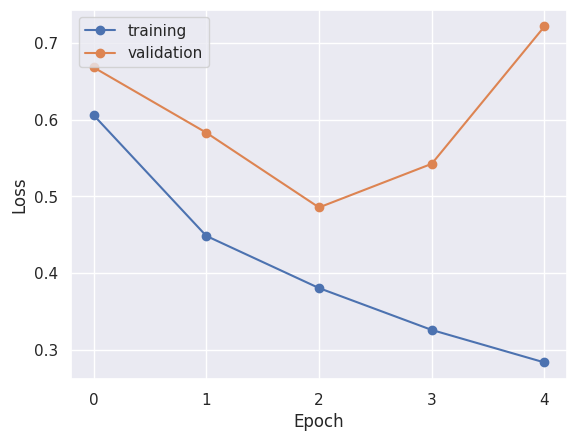

In [ ]:
# plot the history
history = pd.DataFrame(history.history)
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

plot_history(history)



Based on the plot, we can see that the loss is increasing for validation data after epoch 2 while the loss is decreasing for training data. This means that the model is overfitting so we should stop training model after epoch 2 to prevent our model from overfitting and not doing well in the unseen data.

#### ERROR ANALYSIS OF CNN MODEL

191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step


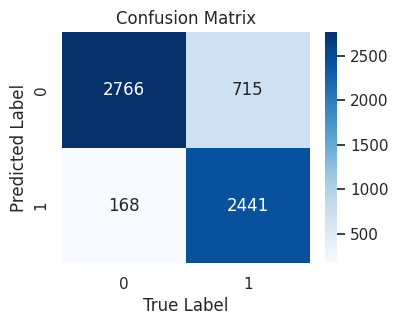

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the training data
predictions = model3.predict([X_train_reduced, np.array([len(x)//10 for x in X_train_reduced])])

# Convert predicted probabilities to binary predictions
predicted_classes = (predictions > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(training_data['target'], predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()



The confusion matrix provides a snapshot of the model's classification performance:

- True Positives (TP): 3368
- True Negatives (TN): 2195
- False Positives (FP): 113
- False Negatives (FN): 414


Based on the analysis of the confusion matrix, the model demonstrates strong performance in correctly classifying both positive and negative instances, as evidenced by the high counts of true positives (TP) and true negatives (TN). However, there are areas for improvement, particularly in reducing the number of false positives (FP) and false negatives (FN).


##SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt

np.random.seed(78)

In [ ]:
vectorizer = TfidfVectorizer(norm='l1')
vectorizer.fit(X_train['text'])

x_train_vectorized = vectorizer.transform(X_train['text'])
x_valid_test_vectorized = vectorizer.transform(X_validation['text'])

In [ ]:
SVM = svm.SVC()
SVM.fit(x_train_vectorized, X_target_data)

SVC()

In [ ]:
svm_predictions = SVM.predict(x_valid_test_vectorized)

accuracy = accuracy_score(svm_predictions, X_validation_target)
print(accuracy)

0.7971109652002626


### ERROR ANALYSIS OF SVM

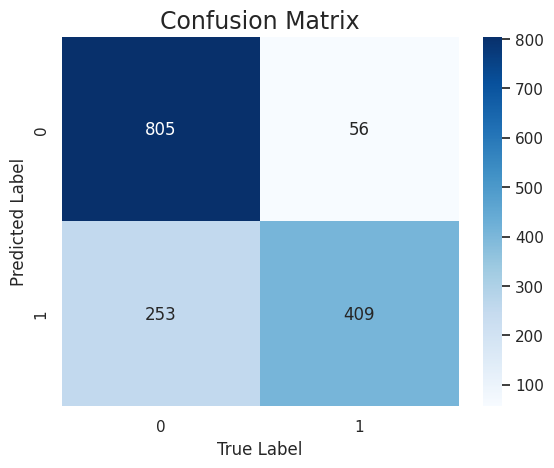

In [ ]:
cf_matrix = confusion_matrix(X_validation_target, svm_predictions)
sns.heatmap(cf_matrix,
			annot=True,
      fmt="d", cmap="Blues")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title('Confusion Matrix',fontsize=17)
plt.show()




The confusion matrix provides a snapshot of the model's classification performance:

- True Positives (TP): 805
- True Negatives (TN): 409
- False Positives (FP): 56
- False Negatives (FN): 253


Based on the analysis of the confusion matrix, the model demonstrates strong performance in correctly classifying both positive and negative instances, as evidenced by the high counts of true positives (TP) and true negatives (TN). However, there are areas for improvement, particularly in reducing the number of false positives (FP) and false negatives (FN).


## RandomForestClassifier



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

np.random.seed(75)

In [ ]:

vectorizer = TfidfVectorizer(norm='l1')
vectorizer.fit(X_train['text'])

x_train_vectorized = vectorizer.transform(X_train['text'])
x_validation_vectorized = vectorizer.transform(X_validation['text'])

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train_vectorized, X_target_data)

RandomForestClassifier()

In [ ]:
random_forest_valid_predict = random_forest.predict(x_valid_test_vectorized)

accuracy = accuracy_score(random_forest_valid_predict, X_validation_target)
print(accuracy)

0.7708470124753776


#### ERROR ANALYSIS OF RandomForestClassifier

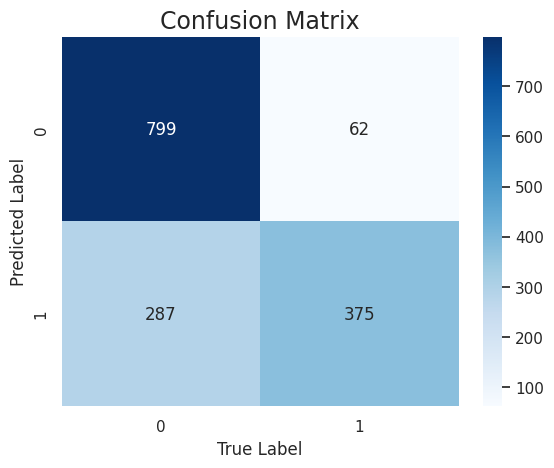

In [ ]:
cf_matrix = confusion_matrix(X_validation_target, random_forest_valid_predict)
sns.heatmap(cf_matrix,
			annot=True,
      fmt="d", cmap="Blues")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title('Confusion Matrix',fontsize=17)
plt.show()




The confusion matrix provides a snapshot of the model's classification performance:

- True Positives (TP): 857
- True Negatives (TN): 36
- False Positives (FP): 4
- False Negatives (FN): 626


Based on the analysis of the confusion matrix, the model demonstrates strong performance in correctly classifying both positive and negative instances, as evidenced by the high counts of true positives (TP) and true negatives (TN). However, there are areas for improvement, particularly in reducing the number of false positives (FP) and false negatives (FN).


#Error Analysis

We found that our SVM model gives the highest accuracy among our other models like CNN, Random Forest and Embedding Models. So here, we are checking our accuracy with train, validation and test dataset

## Check accuracy with train dataset with SVM Model

In [ ]:
x_train_vectorized = vectorizer.transform(X_train['text'])
x_valid_test_vectorized = vectorizer.transform(X_validation['text'])

In [ ]:
svm_train_predictions = SVM.predict(x_train_vectorized)
accuracy = accuracy_score(svm_train_predictions, X_target_data)
print(accuracy)

0.9602627257799672


## Check accuracy with validation dataset

In [ ]:
svm_valid_predictions = SVM.predict(x_valid_test_vectorized)
accuracy = accuracy_score(svm_valid_predictions, X_validation_target)
print(accuracy)

0.7971109652002626


We see that the validation accuracy is 79.71% which is higher than the CNN model's validation accuracy of 77.01 %.

## Check accuracy with test dataset

In [ ]:
test_data_vectorized = vectorizer.transform(test_data['text'])
svm_test_data_predictions = SVM.predict(test_data_vectorized)
print(svm_test_data_predictions)


[0 0 1 ... 1 1 0]


Concatinating target to test dataset temporarily to see how the target columns looks for test dataset.

In [ ]:
test_data["target"] = np.array(svm_test_data_predictions)
test_data

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


Removing the target column and reverting to orginal test dataset

In [ ]:
test_data.drop("target",axis='columns')

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


Creating a csv file for testing in Kaggle Competition

In [ ]:
df = pd.DataFrame({'id': test_data['id'], 'target': svm_test_data_predictions})
df.to_csv('experiment1.csv', index=False)
df

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


**We got a kaggle score of 0.77781 from the SVM model predicted target for test data.**

##Results of other models

###MODEL -> ONE HOT ENCODINGS


|index|loss|accuracy|val\_loss|val\_accuracy|
|---|---|---|---|---|
|5|0\.5559077858924866|0\.7785075902938843|0\.6022689938545227|0\.6912972331047058|
|6|0\.5391969084739685|0\.7965699434280396|0\.5952605605125427|0\.7110016345977783|
|7|0\.5239343047142029|0\.8095238208770752|0\.5889090895652771|0\.7110016345977783|
|8|0\.5098636746406555|0\.8224776387214661|0\.5837004780769348|0\.720853865146637|
|9|0\.4966152608394623|0\.8297755718231201|0\.5784831047058105|0\.720853865146637|

### MODEL1 -> LOGISTIC REGRESSIONS WITH EMBEDDINGS


|index|loss|accuracy|val\_loss|val\_accuracy|
|---|---|---|---|---|
|5|0\.6517247557640076|0\.6013501286506653|0\.6450443863868713|0\.610837459564209|
|6|0\.6433603167533875|0\.6214194297790527|0\.6363485455513|0\.6387520432472229|
|7|0\.6344422698020935|0\.6458675265312195|0\.6269652247428894|0\.6650246381759644|
|8|0\.6251296997070312|0\.6679438352584839|0\.6175940036773682|0\.6912972331047058|
|9|0\.6156138777732849|0\.6869184374809265|0\.6079957485198975|0\.7077175974845886|

### MODEL3 CNN MODEL

| Epoch | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|-------|---------------|-------------------|-----------------|---------------------|
|   1   |   0.603348    |      0.657362     |      0.688688   |       0.576355      |
|   2   |   0.436115    |      0.805692     |      0.642524   |       0.596059      |
|   3   |   0.359561    |      0.844189     |      0.535663   |       0.756979      |
|   4   |   0.307661    |      0.869549     |      0.559532   |       0.770115      |
|   5   |   0.271759    |      0.889801     |      0.612101   |       0.770115      |



# CONCLUSION

Out of all the models Support Vector Machine stand out as the best performing model on this task with TF-IDF vectorization. The validation accuracy came out to be 79.71 % which is highest among the models we ran, including embedding models & CNN model. Also in the end, we tested our accuracy for the test dataset in the kaggle competition with the score of 0.77781

One key thing that we noticed was how the accuracy changes by just modifying some parameters and also complex neural networks might not be the answer to all the problems. As we observed our best result from SVM which is not a neural network model.